In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Used the chart on page 7 of this document: https://www.ashrae.org/file%20library/technical%20resources/standards%20and%20guidelines/standards%20addenda/55_2017_d_20200731.pdf

To derive occupied limits of [20, 24] C.

Let's assume unoccupied limits are [16, 28] C ?

In [27]:
times = pd.date_range(start="2022-01-01 00:00:00", end="2022-01-02 00:00:00", freq="300s")
len(times)

289

In [28]:
# # General control problem
# occ = (20, 24.5)
# unocc = (16, 28)

# # Rule based control problem
occ = (23, 24)
unocc = (26, 27)

lower = unocc[0] * np.ones(len(times))
upper = unocc[1] * np.ones(len(times))
data = np.stack((lower, upper)).T

df = pd.DataFrame(data=data, index=times, columns=["comfort_min", "comfort_max"])
df["comfort_min"]["2022-01-01 07:00:00":"2022-01-01 18:00:00"] = occ[0]
df["comfort_max"]["2022-01-01 07:00:00":"2022-01-01 18:00:00"] = occ[1]
df.head()

,comfort_min,comfort_max
2022-01-01 00:00:00,26.0,27.0
2022-01-01 00:05:00,26.0,27.0
2022-01-01 00:10:00,26.0,27.0
2022-01-01 00:15:00,26.0,27.0
2022-01-01 00:20:00,26.0,27.0


<AxesSubplot:>

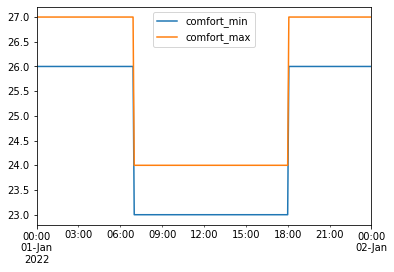

In [29]:
df.plot()

In [30]:
df.to_csv("./comfort-band-rbc.csv")